### Basic code

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kruskal, pearsonr, kendalltau, mannwhitneyu, tiecorrect
from sklearn.utils import resample
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [9]:
file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Data/perMatchperTeamStats.csv'
df = pd.read_csv(file_path)
# print(df.head())

# Experiment (XGBoost) (17/08/2024)

Calculate all the feature importances:
  
*   With all the features
*   'Average' features
*   'Total' features



## All the features

### Model

In [13]:
X = df[['matchAverageRank',
    'totalTeamKills',
    'totalTeamDeaths',
    'totalTeamTurretKills',
    'totalTeamEpicMonsterKills',
    'totalTeamGold',
    'totalTeamGPM',
    'averageTeamChampExperience',
    'averageTeamVisionScore',
    'averageTeamMinionsKilled',
    'teamIndegreeCentrality',
    'teamOutdegreeCentrality']]

y = df['win']
# X = df.drop(columns=['win'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a binary classification
    eval_metric='logloss',        # Logarithmic Loss as evaluation metric
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Save the feature importance to an Excel sheet
#output_file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment_base/all_feature_importance.xlsx'
#importance_df.to_excel(output_file_path, index=False)

print(f'Feature importance has been saved to {output_file_path}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 95.77%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       690
           1       0.97      0.95      0.96       706

    accuracy                           0.96      1396
   macro avg       0.96      0.96      0.96      1396
weighted avg       0.96      0.96      0.96      1396

Feature importance has been saved to /content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/all_feature_importance.xlsx


In [14]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


### Graph

<Figure size 1200x800 with 0 Axes>

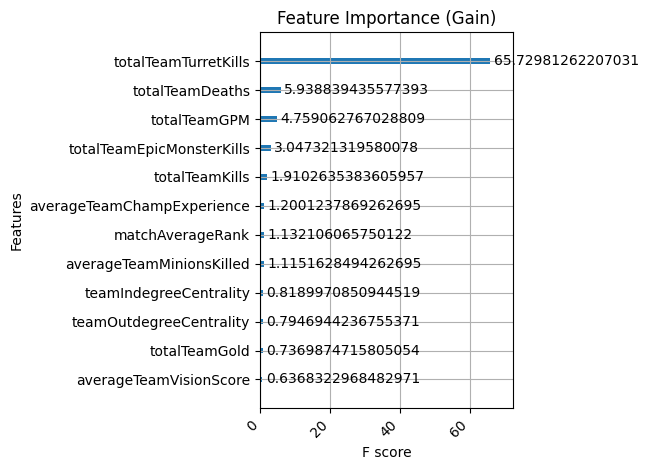

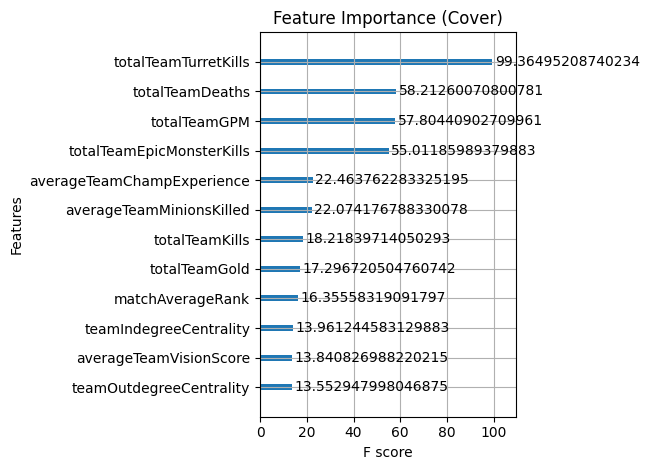

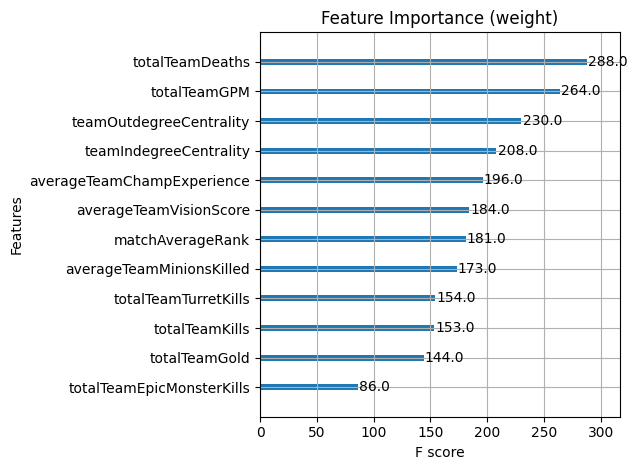

In [18]:
# Define the path where the plots will be saved
#save_path = "/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/Graphs/"

# Gain
# Defn: average improvement in the model's loss function
# Unit of measurement: Absolute values

# Plot and save Feature Importance (Gain)
figsize = (12, 8)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig(f"{save_path}gain_all_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()


# Cover
# Defn: Average coverage (i.e., the proportion of observations) affected by a feature when it is used to split a node
# Unit of measurement: relative frequency of samples affected by splits involving the feature.

xgb.plot_importance(model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.tight_layout()
#plt.savefig(f"{save_path}cover_all_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Frequency/Weight
# Defn: No. of times a feature is used to split data across all trees in the model.
# Unit of measurement: Raw count

xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (weight)")
plt.tight_layout()
#plt.savefig(f"{save_path}weight_all_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

## Average

### Model

In [19]:
X = df[['matchAverageRank',
    'averageTeamChampExperience',
    'averageTeamVisionScore',
    'averageTeamMinionsKilled',
    'teamIndegreeCentrality',
    'teamOutdegreeCentrality']]

y = df['win']
# X = df.drop(columns=['win'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a binary classification
    eval_metric='logloss',        # Logarithmic Loss as evaluation metric
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Save the feature importance to an Excel sheet
#output_file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/avg_feature_importance.xlsx'
#importance_df.to_excel(output_file_path, index=False)

print(f'Feature importance has been saved to {output_file_path}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 72.21%
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       690
           1       0.70      0.78      0.74       706

    accuracy                           0.72      1396
   macro avg       0.72      0.72      0.72      1396
weighted avg       0.72      0.72      0.72      1396

Feature importance has been saved to /content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/all_feature_importance.xlsx


In [20]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


### Graph

<Figure size 1200x800 with 0 Axes>

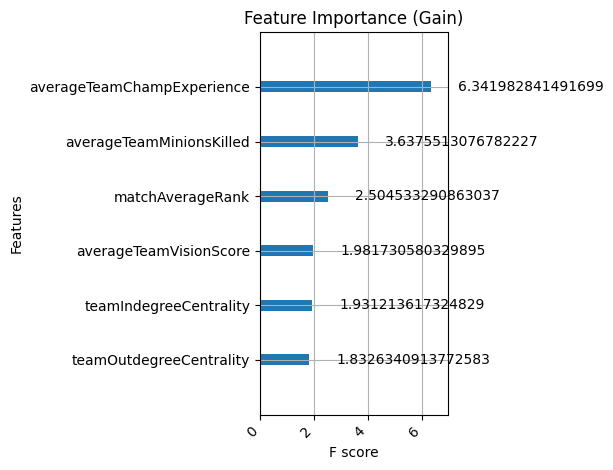

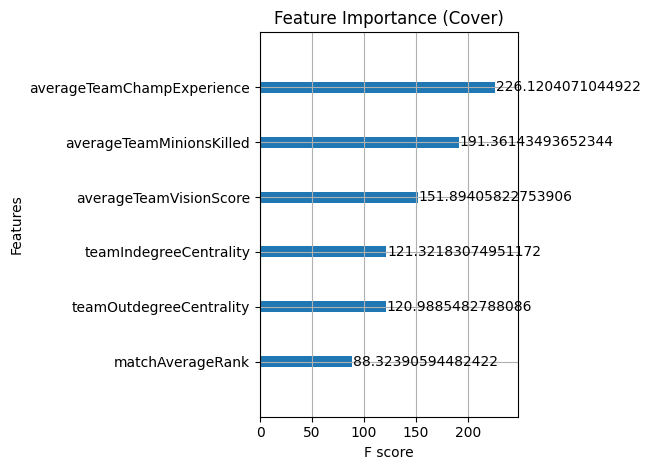

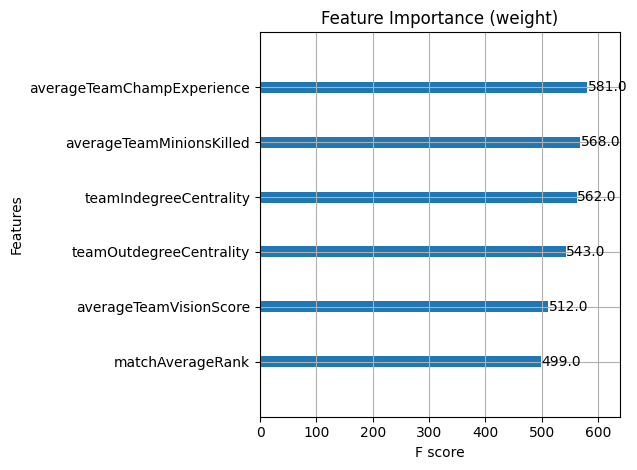

In [22]:
# Define the path where the plots will be saved


# Gain
# Defn: average improvement in the model's loss function
# Unit of measurement: Absolute values

# Plot and save Feature Importance (Gain)
figsize = (12, 8)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig(f"{save_path}gain_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()


# Cover
# Defn: Average coverage (i.e., the proportion of observations) affected by a feature when it is used to split a node
# Unit of measurement: relative frequency of samples affected by splits involving the feature.

xgb.plot_importance(model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.tight_layout()
#plt.savefig(f"{save_path}cover_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Frequency/Weight
# Defn: No. of times a feature is used to split data across all trees in the model.
# Unit of measurement: Raw count

xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (weight)")
plt.tight_layout()
#plt.savefig(f"{save_path}weight_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

## Total

### Model

In [23]:
X = df[['totalTeamKills',
    'totalTeamDeaths',
    'totalTeamTurretKills',
    'totalTeamEpicMonsterKills',
    'totalTeamGold',
    'totalTeamGPM']]

y = df['win']
# X = df.drop(columns=['win'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a binary classification
    eval_metric='logloss',        # Logarithmic Loss as evaluation metric
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Save the feature importance to an Excel sheet
#output_file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/total_feature_importance.xlsx'
#importance_df.to_excel(output_file_path, index=False)

#print(f'Feature importance has been saved to {output_file_path}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:42:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 95.34%
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       690
           1       0.96      0.95      0.95       706

    accuracy                           0.95      1396
   macro avg       0.95      0.95      0.95      1396
weighted avg       0.95      0.95      0.95      1396



In [24]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


### Graph

<Figure size 1200x800 with 0 Axes>

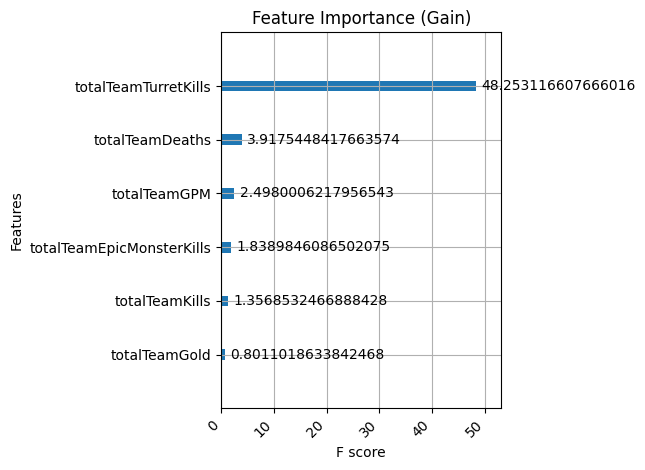

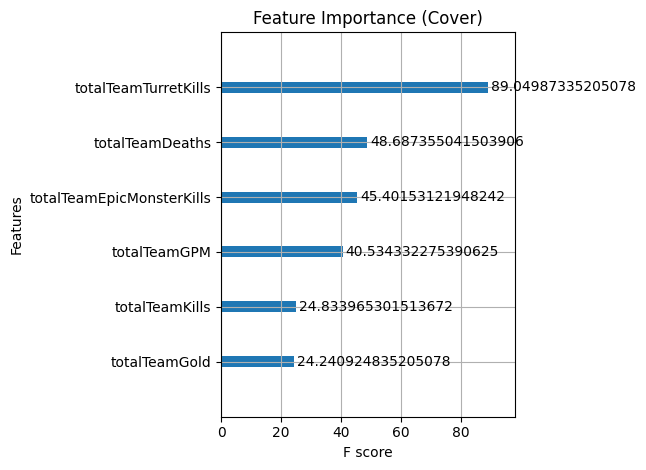

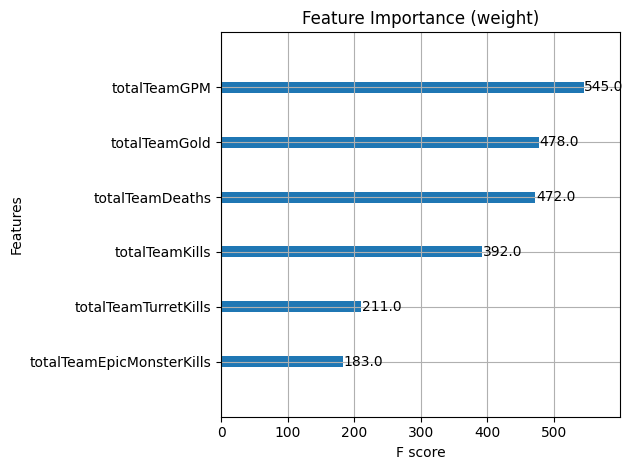

In [26]:
# Define the path where the plots will be saved
#save_path = "/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment/Graphs/"

# Gain
# Defn: average improvement in the model's loss function
# Unit of measurement: Absolute values

# Plot and save Feature Importance (Gain)
figsize = (12, 8)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig(f"{save_path}gain_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()


# Cover
# Defn: Average coverage (i.e., the proportion of observations) affected by a feature when it is used to split a node
# Unit of measurement: relative frequency of samples affected by splits involving the feature.

xgb.plot_importance(model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.tight_layout()
#plt.savefig(f"{save_path}cover_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Frequency/Weight
# Defn: No. of times a feature is used to split data across all trees in the model.
# Unit of measurement: Raw count

xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (weight)")
plt.tight_layout()
#plt.savefig(f"{save_path}weight_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Experiment 1 (XGBoost) (18/08/2024)
Use the following features: 'averageTeamChampExperience', 'averageTeamVisionScore', 'averageTeamMinionsKilled', 'teamIndegreeCentrality', 'teamOutdegreeCentrality', and 'matchAverageRank'. (Total 6 Features)


### Model

In [27]:
df = pd.read_csv('/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Data/perMatchperTeamStats.csv')
data = df

# Normalize the selected features using MinMaxScaler, excluding 'teamIndegreeCentrality' and 'teamOutdegreeCentrality'
scaler = MinMaxScaler()
columns_to_normalize = ['averageTeamChampExperience', 'averageTeamVisionScore', 'averageTeamMinionsKilled', 'matchAverageRank']

data_normalized = scaler.fit_transform(df[columns_to_normalize])
data_normalized_df = pd.DataFrame(data_normalized, columns=[f'{col}_normalize' for col in columns_to_normalize])

# Add the normalized columns to the original dataframe
df = pd.concat([df, data_normalized_df], axis=1)


In [28]:
# Selecting the 6 features
feature_columns = [
    'averageTeamChampExperience_normalize', 'averageTeamVisionScore_normalize',
    'averageTeamMinionsKilled_normalize', 'matchAverageRank_normalize',
    'teamIndegreeCentrality', 'teamOutdegreeCentrality'
]

X = df[feature_columns].values

# Selecting 'win' as the target variable
y = df['win'].values


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a binary classification
    eval_metric='logloss',        # Logarithmic Loss as evaluation metric
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# Save the feature importance to an Excel sheet
output_file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 1/avg_feature_importance.xlsx'
importance_df.to_excel(output_file_path, index=False)

print(f'Feature importance has been saved to {output_file_path}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 72.49%
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       690
           1       0.71      0.77      0.74       706

    accuracy                           0.72      1396
   macro avg       0.73      0.72      0.72      1396
weighted avg       0.73      0.72      0.72      1396

Feature importance has been saved to /content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 1/avg_feature_importance.xlsx


In [32]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


### Graph

<Figure size 1200x800 with 0 Axes>

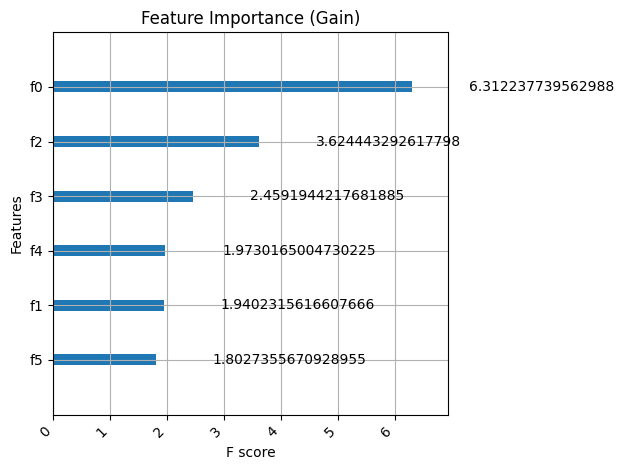

<Figure size 1200x800 with 0 Axes>

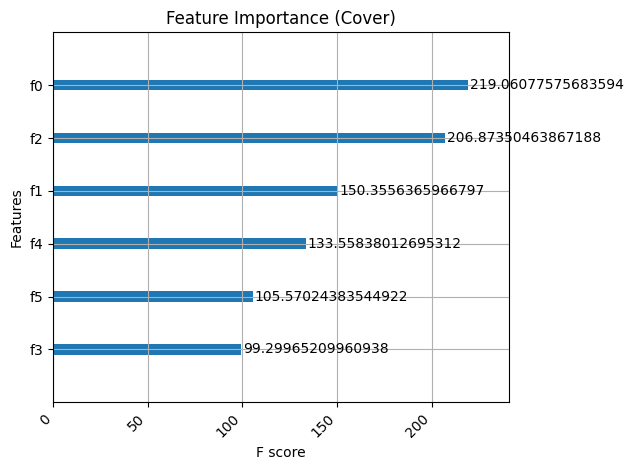

<Figure size 1200x800 with 0 Axes>

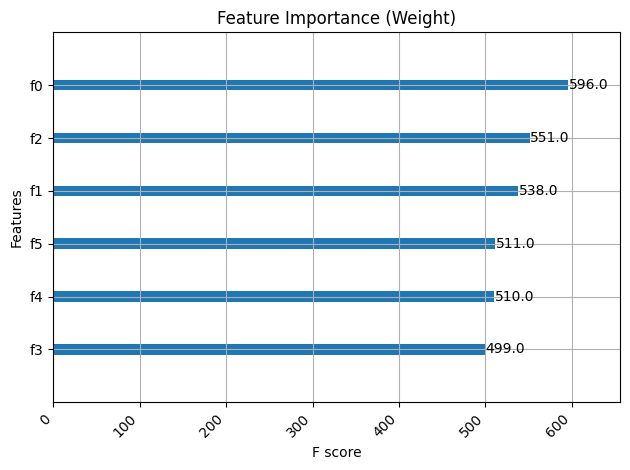

<Figure size 1200x800 with 0 Axes>

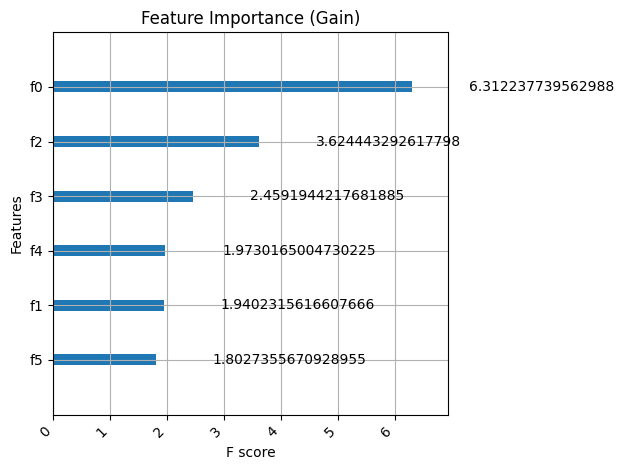

<Figure size 1200x800 with 0 Axes>

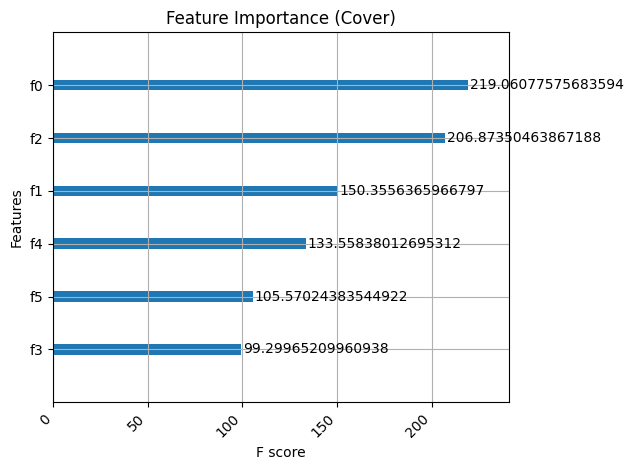

<Figure size 1200x800 with 0 Axes>

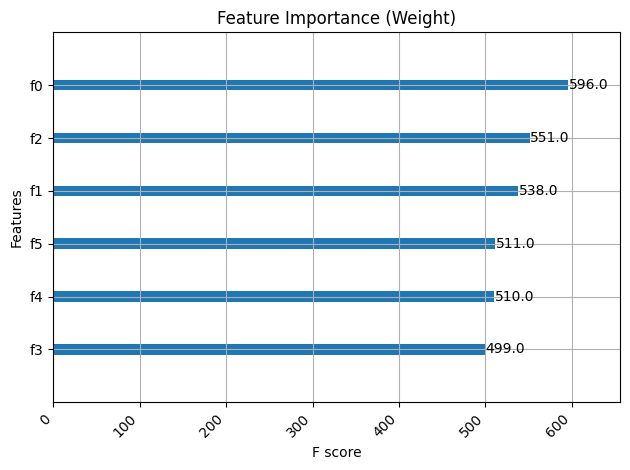

In [33]:
# Define the path where the plots will be saved
save_path = "/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 1/Graphs/"

# Function to update feature names in plot
def update_feature_names(plot, feature_columns):
    for i, label in enumerate(plot.get_xticklabels()):
        if i < len(feature_columns):
            label.set_text(feature_columns[i])
    return plot

# Plot and save Feature Importance (Gain)
figsize = (12, 8)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{save_path}gain_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Plot and save Feature Importance (Cover)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{save_path}cover_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Plot and save Feature Importance (Weight)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{save_path}weight_avg_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Update feature names in the plots
for importance_type in ['gain', 'cover', 'weight']:
    plt.figure(figsize=figsize)
    ax = xgb.plot_importance(model, importance_type=importance_type)
    plt.title(f"Feature Importance ({importance_type.capitalize()})")
    plt.xticks(rotation=45, ha='right')
    ax = update_feature_names(ax, feature_columns)
    plt.tight_layout()
    plt.savefig(f"{save_path}{importance_type}_avg_feature_importance_updated.png", bbox_inches='tight', dpi=300)
    plt.show()


# Experiment 2 (XGBoost)
Use all the features from Experiment 1, along with the average of ('totalTeamKills', 'totalTeamDeaths', 'totalTeamTurretKills', 'totalTeamEpicMonsterKills'), and the average of ('totalTeamGold', 'totalTeamGPM'). (Total 8 Features)



### Model

In [34]:
# Normalize the selected features using MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize_kills = ['totalTeamKills', 'totalTeamDeaths', 'totalTeamTurretKills', 'totalTeamEpicMonsterKills']
columns_to_normalize_gold = ['totalTeamGold', 'totalTeamGPM']

# Normalize and create new columns
df[columns_to_normalize_kills] = scaler.fit_transform(df[columns_to_normalize_kills])
df[columns_to_normalize_gold] = scaler.fit_transform(df[columns_to_normalize_gold])

# Calculate the average of the normalized columns
df['normalized_kills_avg'] = df[columns_to_normalize_kills].mean(axis=1)
df['normalized_gold_gpm_avg'] = df[columns_to_normalize_gold].mean(axis=1)

# Selecting the 8 features: 6 original features and 2 newly added averages
X = df[['averageTeamChampExperience', 'averageTeamVisionScore',
        'averageTeamMinionsKilled', 'matchAverageRank',
        'teamIndegreeCentrality', 'teamOutdegreeCentrality',
        'normalized_kills_avg', 'normalized_gold_gpm_avg']].values

# Selecting 'win' as the target variable
y = df['win'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define feature names for easy reference
feature_columns = [
    'averageTeamChampExperience', 'averageTeamVisionScore',
    'averageTeamMinionsKilled', 'matchAverageRank',
    'teamIndegreeCentrality', 'teamOutdegreeCentrality',
    'normalized_kills_avg', 'normalized_gold_gpm_avg'
]

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Logarithmic Loss as evaluation metric
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# Save the feature importance to an Excel sheet
output_file_path = '/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 2/total_feature_importance.xlsx'
importance_df.to_excel(output_file_path, index=False)

print(f'Feature importance has been saved to {output_file_path}')

# Check the length of feature_columns and feature_importances
if len(feature_columns) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': feature_importances
    })

    # Save the feature importance to an Excel sheet
    importance_df.to_excel(output_file_path, index=False)
    print(f'Feature importance has been saved to {output_file_path}')
else:
    print("Mismatch in length between feature_columns and feature_importances. Please check the feature selection.")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 86.46%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       690
           1       0.86      0.88      0.87       706

    accuracy                           0.86      1396
   macro avg       0.86      0.86      0.86      1396
weighted avg       0.86      0.86      0.86      1396

Feature importance has been saved to /content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 2/total_feature_importance.xlsx
Feature importance has been saved to /content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 2/total_feature_importance.xlsx


### Graph

<Figure size 1200x800 with 0 Axes>

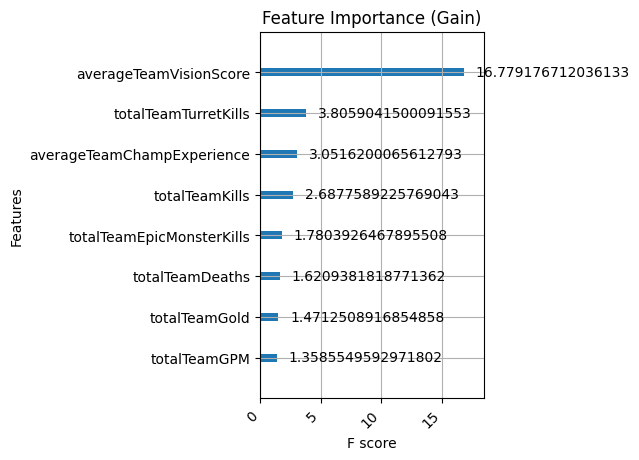

<Figure size 1200x800 with 0 Axes>

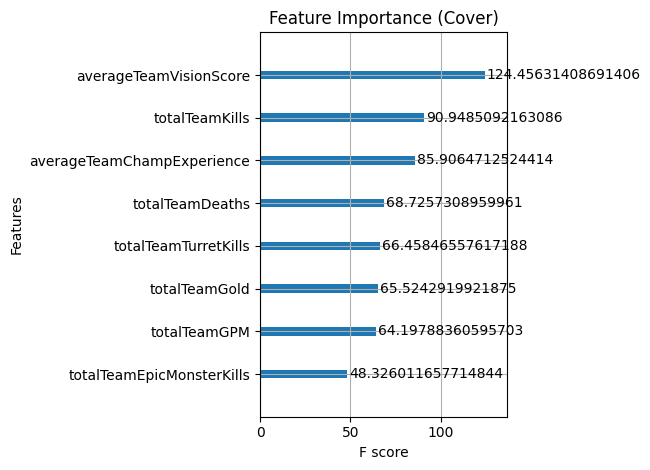

<Figure size 1200x800 with 0 Axes>

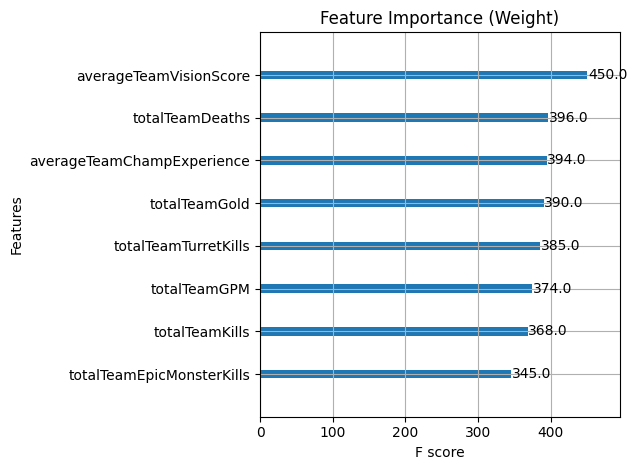

In [35]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Define the path where the plots will be saved
save_path = "/content/drive/My Drive/CODES_REPO/LoL/Feature Importance_LoL/Output/Experiment 2/Graphs/"

# Create a mapping dictionary from feature indices to feature names
feature_names = [
    'totalTeamKills', 'totalTeamDeaths', 'totalTeamTurretKills',
    'totalTeamEpicMonsterKills', 'totalTeamGold', 'totalTeamGPM',
    'averageTeamChampExperience', 'averageTeamVisionScore'
]

# Set the feature names in the model
model.get_booster().feature_names = feature_names

# Plot and save Feature Importance (Gain)
figsize = (12, 8)
plt.figure(figsize=figsize)
ax = xgb.plot_importance(model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{save_path}gain_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Plot and save Feature Importance (Cover)
plt.figure(figsize=figsize)
xgb.plot_importance(model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.tight_layout()
plt.savefig(f"{save_path}cover_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# Plot and save Feature Importance (Weight)
plt.figure(figsize=figsize)
xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.tight_layout()
plt.savefig(f"{save_path}weight_total_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()


# Sample